<font size="6"><b>BASIC PROBABILITY DISTRIBUTIONS: DISCRETE DISTRIBUTIONS</b></font>

<font size="5"><b>Serhat Çevikel</b></font>

<span style="font-size:3em;">**THIS AND THE NEXT SESSION SERVE AS REFRESHERS AND REFERENCE MATERIAL FOR INTRODUCTION TO PROBABILITY THEORY. THERE ARE MANY SIMULATED EXAMPLES TO CLARIFY THE CONCEPTS.
DON'T TRY TO UNDERSTAND THE COMPLEXITY OF THE CODE, THEY ARE JUST TOOLS TO CREATE THE SIMULATIONS AND VISUALS. PLEASE CONCENTRATE ON THE NARRATIVE, THE FLOW OF IDEAS AND THE INTERPRETATION OF THE EXAMPLES, SIMULATIONS AND THE VISUALS.**</span>

In [ ]:
library(data.table)
library(tidyverse)
library(gtools) # for permutations and combinations
library(MASS) # for fractions
library(ggdag) # for viusalizing trees
library(plotly)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [ ]:
options(htmlwidgets_embed=TRUE)

In [ ]:
options(knitr.kable.max_rows = 10)

![xkcd](../imagesba/poisson.jpg)

(https://xkcd.com/12/)

**Note:** For the interactive applications, please:

- Select file browser from the side bar through the symbol: 

- Open the Launcher by hitting the button: 

- Hit "Shiny" button from the Launcher:

  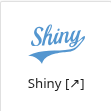

- Navigate to 05_prob_stat_1/apps/

For both discrete and continuous distributions the cumulative probability - or the area under the probability mass/density function is always between 0 and 1.

Discrete probability distributions can take on discrete values on the domain.

The probability mass function shows the probability of each of those discrete values and probability of each value should be between 0 and 1.

In order to demonstrate the genesis of the following discrete probability distribution, the simplest form, Bernoulli trials will be mostly used as a starting point and through simulation the statistical properties of the distributions and the relationships between them will be shown without rigorous mathematical proofs.

# Binomial distribution

Binomial distribution is one of the most basic discrete probability distributions and serve as the basis of other important distributions such as poisson and normal distribution.

Binomial distribution is the distribution of the number of k successes in n trials with binary outcomes (such as coin tosses) in which the success has a probability of p.

So it can be seen as a compressed or aggregated version of Bernoulli distribution.

Let's first simulate some data to show the probability of having 3 heads in 5 flips.

First get all sequences of head (1) and tail (0) values in 5 flips. Total number of sequences are $2^5 = 32$:

In [ ]:
tosses <- permutations(2, 5, 0:1, repeats.allowed = T)

In [ ]:
dim(tosses)

In [ ]:
tosses

However we are interested in sequences that have exactly 3 heads:

In [ ]:
tosses3 <- tosses[rowSums(tosses) == 3,]

In [ ]:
dim(tosses3)

In [ ]:
tosses3

10 sequences have 3 heads in 5 tosses. That is exactly the number of 3 combinations of 5:

In [ ]:
choose(5, 3)

Now let's say the bias of the coin is 0.3, meaning the probability of having a head is 0.3 (so probability of gettting a tail is 0.7). What is the probability of each of these 10 sequences:

${\displaystyle p^{k}(1-p)^{n-k}}$

In [ ]:
px <- 0.3
k <- 3
n <- 5

In [ ]:
px^k * (1 - px)^(n - k)

But we have 10 of these sequences with 3 heads and 2 tails so the total probability of having 3 heads in 5 tosses where the bias of the coin is 0.3 is:

In [ ]:
choose(n, k) * px^k * (1 - px)^(n - k)

The formula for probability mass function is:

${\displaystyle f(k,n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$

where

${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$.

Expected value is:

${\displaystyle \operatorname {E} [X]=np}$

And variance is:

${\displaystyle \operatorname {Var} (X)=npq=np(1-p)}$

In fact we don't have to write that whole formula of probability mass function explicitly. R has builtin support for a wide range of probability distributions and add-on packages provide further support for more diverse range of distributions.

For binomial distribution the probability of a discrete value of k out of n with a bias of p can be calculated with the probability mass function of binomial distribution in R, `dbinom`:

In [ ]:
dbinom(3, 5, 0.3)

For other discrete values of k, the probabilities are:

In [ ]:
propbin <- dbinom(0:5, 5, 0.3)
propbin

Which sum up to 1:

In [ ]:
sum(propbin)

And demonstrate a roughly bell shape (this might ring some bell in your mind as to its similarity to some other famous statistical shape):

In [ ]:
plot(propbin, type = "l")

We can also run an interactive simulation "Binomial Shapes" under 05_prob_stat_1/apps with Shiny interface.

## Band of four: Suite of functions for a statistical distribution in R

Four people can make a great rock band:

<img src="../imagesba/led_zeppelin.jpg" width="500"/>

And this is how a great rock band should look and sound:

[![dac](https://img.youtube.com/vi/5cGJ5eIdp24/0.jpg)](https://youtu.be/5cGJ5eIdp24?t=423)

Or this:

[![bd](https://img.youtube.com/vi/6tlSx0jkuLM/0.jpg)](https://www.youtube.com/watch?v=6tlSx0jkuLM)

And a suite of four functions can make a great band for working with statistical distributions in R:

- dXXXX: The density function, "probability mass function" for discrete distributions, the probability of getting a certain discerete value. It works as a "probability density function" for continuous distributions. Note that for continuous distributions, the probability of a single value is 0, so the density shows the instantaneous change in the cumulative probability of the distribution. Note that while the total probability of all values in the domain must sum to 1, the density of a certain value can be above 1.

- pXXXX: Cumulative probability function, the total probability of all values in the domain equal to q or below. It ranges from 0 to 1. It is the inverse of qXXXX function.

- qXXXX: Quantile function, the value in the domain where the cumulative probability equals p. It is the inverse of pXXXX function

- rXXXX: Random number generator function, samples pseudo random numbers from the distribution with given parameters

For the case of binomial distribution, we already saw `dbinom`:

In [ ]:
propbin <- dbinom(0:5, 5, 0.3)
propbin

In [ ]:
sum(propbin)

In [ ]:
plot(propbin, type = "l")

The cumulative probability function:

In [ ]:
cpropbin <- pbinom(0:5, 5, 0.3)

In [ ]:
cpropbin

For a discrete distribution this is basically the cumulative sum of discrete probabilities:

In [ ]:
cumsum(propbin)

The quantile function, inverse of cumulative probability function:

In [ ]:
qbinom(cpropbin, 5, 0.3)

And the random number generator:

In [ ]:
set.seed(50)
sampbinom <- rbinom(1e4, 5, 0.3)

The histogram is roughly the shape of the probability mass function drawn above from dbinom output:

In [ ]:
hist(sampbinom)

And we can compare the theoretical distribution with the empirical one from the randomly generated sample:

In [ ]:
propbin

In [ ]:
rpropbin <- as.numeric(prop.table(table(sampbinom)))
rpropbin

In [ ]:
plot(propbin, type = "l", col = "blue")
lines(rpropbin, col = "red")

The mean of binomial distribution is $np$ while the variance is $np(1-p)$

In [ ]:
meant <- 5 * 0.3
meant

In [ ]:
vart <- 5 * 0.3 * (1-0.3)
vart

Compare with the random sample:

In [ ]:
meanr <- mean(sampbinom)
meanr

In [ ]:
varr <- var(sampbinom)
varr

## Example

> In the World Series Baseball, the final two teams
play a series consisting of no more than seven games until one of the
teams has won four games. The winner takes all of the prize money
of $1 000 000. In one such a final, two teams are pitted against one
another and the stronger team will win any given game with a probability of 0.55. Unexpectedly, the competition must be suspended
when the weaker team leads two games to one. How should the prize
money be divided if the remaining games cannot be played?

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 81)

**Solution:**

Let's formulize the problem using binomial distribution.

- p of stronger team (S) is 0.55 and p of weaker team (W) is 0.45
- At suspension the points are 2 for W 1 for S
- The first team to reach 4 points is the winner
- The max games they have to play is:

In [ ]:
ngames <- (4 - 2) + (4 - 1) - 1
ngames

The last minus is there because, only the first one to reach 4 points will be proclaimed the winner.

For the W to win, it must win at least 2 games in 4 games:

In [ ]:
pweak <- sum(dbinom(2:4, 4, 0.45))
pweak

Alternatively, using the complement rule and cumulative probability up to 1 games:

In [ ]:
1 - pbinom(1, 4, 0.45)

So the prize should be divided as:

In [ ]:
1e6 * pweak

to W and:

In [ ]:
1e6 * (1 - pweak)

to S

Later on, we will see how binomial distribution is related to Poisson distribution and normal distribution.

# Geometric distribution

Geometric distribution is the distribution of number of Bernoulli trials (coin tosses) to get a success (head) or number of fails (tail) before a success.

So it may be thought of as a discrete time to success distribution.

While two versions of the distribution can be calculated as the probability of $k$ number of trials including the first success or $k$ number of (failed) trials until the first success, following the choice of the base R function, we will stick to the second definition of $k$ number of trials until (and excluding) the first success. For a bias of $p$ the probability of having $k$ tails (failures) before the first head (success) is:

${\displaystyle \Pr(Y=k)=(1-p)^{k}p}$

The expected value is:

${\displaystyle \operatorname {E} (Y)={\frac {1-p}{p}}}$

while the variance is:

${\displaystyle \operatorname {var} (Y)={\frac {1-p}{p^{2}}}}$

(https://en.wikipedia.org/wiki/Geometric_distribution)

So we have to get $k$ failures each with a probability of $1-p$, followed by a success with a probability of $p$.


Note that we don't have to multiply the probability with the number of combinations or sequences that result in the certain number of tails because there is only one sequence which is just a series of tails before the first head.

The probabilities follow a geometric sequence, since each successive value is the previous one multiplied by $1-p$, and hence the distribution is called geometric.

We can extract the $k$ trials until success from a sequence of Bernoulli trials. Let's try it with a fair coin:

In [ ]:
px <- 0.5

In [ ]:
set.seed(40)
bernt <- rbinom(1e4, 1, px)

In [ ]:
summary(bernt)

How can we get the $k$'s to success?

One way is to use the run length function `rle` in base R. Run lengh encoding clusters equal contiguous values and returns those values along with their frequencies:

In [ ]:
rle0 <- rle(bernt)

In [ ]:
str(rle0)

Convert it to a data.table:

In [ ]:
setDT(rle0)

Filter for length where value is 0 (for tail or failure):

In [ ]:
table(rle0[values == 0, lengths])

In [ ]:
hist(rle0[values == 0, lengths])

Note that `rle` calculates the successive number of same values in the vector, so when we have consecutive 1's, the number of trials to success must be 0 and `rle` excludes those 0 length runs. We can calculate the number of 0 length runs as such:

In [ ]:
rle0[values == 1, sum(lengths - 1)]

Since if we have a sequence of $n$ successes, we have $n-1$ zero length sequence of failures until success.

A second way is more general in the sense that we can also use it for the next distribution, negative binomial, and we don't have to treat zero length runs separately.

First let's create a data.table out of the simulated values, to wrangle easier:

In [ ]:
bernt_dt <- data.table(bernt)

Add an index so that we can reverse the order and get it back easily:

In [ ]:
bernt_dt[, ind := .I]

Reverse the order:

In [ ]:
setorder(bernt_dt, -ind)

Add a cumulative sum:

In [ ]:
bernt_dt[, csum := cumsum(bernt)]

Get back the original order:

In [ ]:
setorder(bernt_dt, ind)

Reverse the cumulative sum values, starting from 1:

In [ ]:
bernt_dt[, csum := max(csum) - csum + 1]

What we have now:

See that, each sequence starting with a new failure until the success has a separate csum value. The csum value can be considered a sequence index:

In [ ]:
bernt_dt

Now get the length of each failure sequence, one minus the total lenth of sequence:

In [ ]:
lengths0 <- bernt_dt[, .(lengthx = .N - 1), by = csum][, lengthx]

In [ ]:
summary(lengths0)

Total number of sequences is (for the purposes of simulating from geometric distribution), this is equal to total number of successes:

In [ ]:
nlengths0 <- length(lengths0)
nlengths0

The empirical bias value is obviously number of successes divided by the total sample size:

Let's simulate values from geometric distribution:

In [ ]:
set.seed(62)
simul0geom <- rgeom(nlengths0, px)
#simulgeom <- simulgeom[simulgeom != 0]

Compare the contingency tables that we extract from Bernoulli trials and geometric distribution simulation:

In [ ]:
table(lengths0)

In [ ]:
table(simul0geom)

We see that values are quite similar.

Now let's compare the histograms:

In [ ]:
hist(lengths0)

In [ ]:
hist(simul0geom)

They are also quite similar.

Now let's compare the empirical and theoretical probability mass functions:

The unique length values:

In [ ]:
lengths0u <- sort(unique(lengths0))
lengths0u

And max length values:

In [ ]:
lengths0max <- max(lengths0u)
lengths0max

In [ ]:
plot(lengths0u, as.numeric(prop.table(table(lengths0))), type = "l", col = "red")
lines(0:lengths0max, dgeom(0:lengths0max, px), col = "blue")

The curves nearly coincide, so we confirm that the number of trials before success in a sequence of Bernoulli trials is geometrically distributed. 

Now let's compare the empirical and theoretical mean and variance values:

Theoretical mean is:

In [ ]:
(1 - px) / px

And variance is:

In [ ]:
(1 - px) / px^2

Empirical values are:

In [ ]:
mean(lengths0)

In [ ]:
var(lengths0)

Quite close

## Example 1 (Optional)

An important use of geometric distribution can be probing whether a certain sequence of Bernoulli trials are authentic and random or artificially generated.

Let's say someone came up with a sequence of coin tosses claimed to have been generated by a random process. But we suspect that the sequence is artificially generated.

If people are making up a sequence of coin tosses from imagination, they will be reluctant to record long sequences of same values since they will assume long sequences appear less frequently than probability theory says. So people may have a tendency to temporarily decrease the bias in subsequent successes/heads or increase the bias in subsequent failures/tails, until the new value is inverted so the run is reset and so is the bias.

The idea is also echoed in a resource:

> Most people tend to avoid noting long sequences of consecutive
heads or tails. Truly random sequences do not share this human tendency!

(Tijms 2007, Understanding Probability: Chance Rules in Everyday Life, p. 192)

Let's create a matrix of simulated Bernoulli trials, where each column represents a different bias between 0 and 1, set apart by 0.1:

In [ ]:
set.seed(60)
bernshortrun <- rbinom(1.1e5, 1, seq(0, 1, 0.1))

In [ ]:
bernshortrunm <- matrix(bernshortrun, ncol = 11, byrow = T)

So the first columns is always 0 and the last column is always 1:

In [ ]:
bernshortrunm

In [ ]:
dim(bernshortrunm)

The empirical means are:

In [ ]:
colMeans(bernshortrunm)

Let's set the true intended bias to 0.5:

In [ ]:
bias <- 0.5

We track or reset the column index to pick the value from for each row. So if the 1 values persist, we decrease the bias until we reach the first column of all 0's. If the 0 values persist, we increase the bias until we reach the last column of all 1's.

In [ ]:
lastval <- -1
biasc <- 1 + bias * 10
colx <- biasc
vals <- rep(NA, 1e4)

In [ ]:
for (iter in 1:1e4)
{
    newval <- bernshortrunm[iter, colx]
    vals[iter] <- newval
    resetx <- (newval != lastval)

    if (resetx)
    {
        colx <- biasc
    } else
    {
        directx <- 1 - newval * 2
        colx <- colx + directx
    }
    lastval <- newval
}

The empirical bias in the column for intended bias of 0.5 is:

In [ ]:
bias1 <- mean(bernshortrunm[, biasc])
bias1

And the empirical bias for the "fake" simulated values is:

In [ ]:
bias2 <- mean(vals)
bias2

They are both close to the originally intended bias. So we cannot discriminate the genuine and fake simulations just looking at the empirical biases.

Let's extract the failure lengths in the genunine sequence using the easier rle method:

In [ ]:
rle1 <- rle(bernshortrunm[, biasc])

In [ ]:
setDT(rle1)

And get the number of zero length failure sequences:

In [ ]:
rle1zero <- rle1[values == 1 & lengths > 1, sum(lengths - 1)]
rle1zero

Now let's do the same to the "fake" simulations:

In [ ]:
rle2 <- rle(vals)

In [ ]:
setDT(rle2)

In [ ]:
rle2zero <- rle2[values == 1 & lengths > 1, sum(lengths - 1)]
rle2zero

Combine genuine failure length with the respective zero values:

In [ ]:
rle1_with0 <- c(rle1[values == 0, lengths], rep(0, rle1zero))

Total number of sequences:

In [ ]:
rle1length <- length(rle1_with0)

In [ ]:
rle1length

Now simulate the same number of values from geometric distribution with the same bias:

In [ ]:
set.seed(65)
simul1geom <- rgeom(rle1length, bias)
#simulgeom <- simulgeom[simulgeom != 0]

Compare contingency tables:

In [ ]:
table(rle1_with0)

In [ ]:
table(simul1geom)

They are quite close.

And compare histograms:

In [ ]:
hist(rle1_with0)

In [ ]:
hist(simul1geom)

Similar again. Now show the empirical and theoretical probability mass functions:

In [ ]:
lengthx1 <- sort(unique(rle1_with0))

In [ ]:
plot(lengthx1, as.numeric(prop.table(table(rle1_with0))), type = "l", col = "red")
lines(lengthx1, dgeom(lengthx1, bias1), col = "blue")

They perfectly coincide, we can be sure that the Bernouilli trials are genuine

We can also confirm that with the empirical mean and variance values:

In [ ]:
mean(rle1_with0)

In [ ]:
var(rle1_with0)

Now let's repeat the same procedure for the fake sequence:

In [ ]:
rle2_with0 <- c(rle2[values == 0, lengths], rep(0, rle2zero))

In [ ]:
rle2length <- length(rle2_with0)

In [ ]:
set.seed(70)
simul2geom <- rgeom(rle2length, bias)

In [ ]:
table(rle2_with0)

In [ ]:
table(simul2geom)

The empirical length are capped with 6, while the simulated lengths from the geometric distributions can be longer.

The zero length failures are less frequent (since success sequences are shorter) and short sequences between 1-3 are more frequent than the simulated geometric distribution values.

Let's compare the histograms:

In [ ]:
hist(rle2_with0)

In [ ]:
hist(simul2geom)

And compare the empirical and theoretical probability mass functions:

In [ ]:
lengthx2 <- sort(unique(rle2_with0))

In [ ]:
plot(lengthx2, as.numeric(prop.table(table(rle2_with0))), type = "l", col = "red")
lines(lengthx2, dgeom(lengthx2, bias2), col = "blue")

The theoretical distribution is more convex than the empirical one. And the theoretical distribution is actually not capped at 6.

Now let's calculate the empirical mean and variance values:

While the mean is close to the theoretical value:

In [ ]:
mean(rle2_with0)

The variance is much lower:

In [ ]:
var(rle2_with0)

So we can highly suspect that the second sequence of Bernoulli trials are not genuine but artifically created with a non-random process.

## Example 2

> Two desperados, A and B, are playing a game of
Russian roulette using a gun. One of the gun’s six cylinders contains
a bullet. The desperados take turns pointing the gun at their own
heads and pulling the trigger. Desperado A begins. If no fatal shot
is fired, they give the cylinder a spin such that it stops at a random
chamber, and the game continues with desperado B, and so on. What
is the probability that desperado A will fire the fatal shot?

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 18)

**Solution:**

Contrary to the standard Russian Rullette, since the cylinder is spinned after every shot, theoretically the game can extend infinitely.

Since the first shot is done with A, the fatal shot for A can occur after 0, 2, 4, 6 ... even number of non-fatal shots and a fatal shot for B can occur after 1,3,5 ... odd number of non-fatal shots.

To get the share of the total probability of even numbered shots up to infinity, it is sufficient just to get the share of the probability of 0 shot to sum of the probabilities of 0 and 1 shots. Why? Because the subsequent values form a geometric series, the ratio of each subsequent probability is the same, from the beginning to infinity:

In [ ]:
fractions(dgeom(0, 1/6) / pgeom(1, 1/6))

We can also calculate a large number of probability values to confirm:

In [ ]:
fractions(sum(dgeom(seq(0, 1000, 2), 1/6)))

Later on, we will see that geometric distribution is the discrete analogue of exponential distribution for waiting times.

# Poisson distribution

Poisson distribution is a limiting case of binomial distribution where the trial number goes to infinity and the expected success probability - the bias - converges to zero while the expected value is kept at a constant rate.

Poisson distribution is quite useful to model count data of independent in real life. We will use this distribution to demonstrate the relationship between geometric and exponential distributions and also the relationship between negative binomial and gamma distributions.

As we will also demonstrate, Poisson distribution converges to normal distribution as the expected value increases.

As we can recall from above, the binomial distribution models the probability of recording $k$ successes in a finite number of $n$ trials or events where the probability of success is $p$. The probability mass function of binomial distribution is:

${\displaystyle f(k,n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$

And the expected value is defined as:

${\displaystyle \operatorname {E} [X]=np}$

The realizations of $k$ can be between 0 and as high as $n$, the finite number of trials conducted.

Instead of parametrizing binomial distribution as $n$ and $p$, suppose we reparametrize binomial distribution so that we hold the expected value, now defined as $\lambda$ constant while we can increase $n$, total number of trials. In this  case, holding the expected rate constant,

${\displaystyle p = \frac {\lambda}{n}}$

becomes smaller, so the event becomes rarer.

Since $k$ can be between 0 and $n$, as $n$ grows larger possible values of $k$, number of successes have more options to be realized.

Suppose we have $\lambda = 20$ and $n$ is started with 100 and increased up to 10000. Let's plot the probability mass of k values between 0 and 100

Alternative trial sizes are:

In [ ]:
ns <- c(10, 20, 100, 1000, 1e4)

Fixed expected rate is:

In [ ]:
lambda <- 4

Realization values to be plotted are:

In [ ]:
ks <- 0:15

Calculate the probabilities of all realized values for all trial sizes and implied expected probabilities:

In [ ]:
binomgrid <- lapply(ns, function(x) data.table(n = x, k = ks, probs = dbinom(ks, x, lambda / x)))

In [ ]:
poisgrid <- data.table(n = Inf, k = ks, probs = dpois(ks, lambda))

In [ ]:
binomgrid <- c(binomgrid, list(poisgrid)) %>% rbindlist

And plot the probability mass function curves for different trial sizes:

In [ ]:
binomgrid_p <- binomgrid %>%
mutate_at("n", as.factor) %>%
ggplot(aes(x = k, y = probs, color = n)) +
geom_line()

In [ ]:
binomgrid_p

In [ ]:
ggplotly(binomgrid_p)

Binomial distribution starts with a shape, more peaked in the middle but thinner in the tails. As the trial size is increased the shape becomes smoother and converges to poisson distribution as shown by Inf trial size.

You can also interactively track how binomial distribution converges to poission distribution with a fixed expected value and increasing trial size by running the **Binomial to Poisson Distribution** app under 05_prob_stat_1/apps with Shiny interface.

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time if these events occur with a known constant mean rate and independently of the time since the last event.

The probability mass function of poission distributions is:

${\displaystyle f(k;\lambda )=\Pr(X{=}k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}},}$

where $\lambda$ is the expected rate, $k$ is the number of occurence or realized count.

Both mean and variance is equal to the expected rate $\lambda$:

${\displaystyle \lambda =\operatorname {E} (X)=\operatorname {Var} (X)}$

(https://en.wikipedia.org/wiki/Poisson_distribution)

Formula for probability mass function in R is easy, realized value and the expected value:

In [ ]:
dpois(0:20, 2)

## Example 1

> There are 500 people present at a gathering. For the
fun of it, the organizers have decided that all of those whose birthday
is that day will receive a present. How many presents are needed to
ensure a less than 1% probability of having too few presents?

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 90)

**Solution:**

We can model the problem using binomial distribution but also using Poisson distribution since the population size is sufficiently large. Let's do both.

We ignore the leap year convention and take number of days in a year as 365.

Using the complement rule, less than 1% probability of having too few presents mean more than 99% probability of having enough presents. So we want to calculate the cumulative probability of k people having a birthday at that date, or alternatively calculate the k value where the cumulative probability is at least 99%.

With binomial distribution, the cumulative probabilities are:

In [ ]:
pbinom(0:10, 500, 1/365)

Anf the quantile value of 99% cumulayive probability is:

In [ ]:
qbinom(1 - 0.01, 500, 1/365)

With Poisson distribution:

In [ ]:
ppois(0:10, 500/365)

In [ ]:
qpois(1 - 0.01, 500/365)

So 5 presents suffice to ensure at least 99% who shares a birthday at that date gets a present.

## Poisson process

A Poisson point process is a memoryless process in which events occur continuously and independently at a constant average rate. When the inter-occurence times are exponentially distributed with expected value ${\displaystyle \operatorname {E} [X]={\frac {1}{\lambda }}}$,

The number of events occurring in any time interval of length $t$ has a Poisson distribution with expected value ${\displaystyle \lambda{t}}$.

(https://en.wikipedia.org/wiki/Exponential_distribution)

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 113)

Basically that means, for a Poisson process with an expected rate of $\lambda$ per unit time, the counts that occur in $t$ units time is Poisson distributed with an expected rate of ${\displaystyle \lambda{t}}$.

Later we will show the expected waiting times in a Poisson distributed variable is exponentially distributed conducting discrete Bernoulli trials and showing how the geometrically distributed discrete trials to success converge to a continuous exponential distribution.

## Example 2

> In a traditional match between two university soccer
teams, goals are scored according to a Poisson process at a rate of
$\lambda = 1/30$ per minute. The playing time of the match is 90 minutes.
What is the probability of having three or more goals during the
match? What is the probability that exactly two goals will be scored
in the first half of the match and exactly one goal in the second half?

(Tijms 2023, A First Course In Probability For Computer And Data Science, p. 114)

**Solution:**

Number of goals during the 90 minutes match is Poisson distributed with an expected rate of:

In [ ]:
lmatch <- 90 / 30
lmatch

Probability of having 3 or more goals is the complement of having up to 2 goals:

In [ ]:
1 - ppois(2, lmatch)

Since Poisson process is memoryless, number of goals in both halves are independent and Poisson distributed with an expected rate of:

In [ ]:
lhalf <- 45 / 30
lhalf

So the probability of 2 goals scored in the first half and one goal in the second half is:

In [ ]:
dpois(2, lhalf) * dpois(1, lhalf)

Compare it with probability of scoring 3 goals in the whole match:

In [ ]:
dpois(3, lmatch)

# APPENDIX: Other important discrete probability distributions (Optional)

## Negative binomial distribution (Optional)

While geometric distribution is used in order to calculate the probability of number of failures until a successs, negative binomial distribution is used for modeling the probability of number of failures until a certain number of successes.

So geometric distribution is a special case of negative binomial distribution.

A few useful applications can be considered for negative binomial distribution:

1. Project Management: In project management, the Negative Binomial Distribution can be applied to estimate the number of trials (attempts or tasks) required to complete a project with a certain number of successful outcomes (milestones achieved or tasks completed). This helps in project planning and resource allocation.

2. Quality Control: In manufacturing and quality control, the distribution can be used to model the number of defective items produced before reaching a certain number of acceptable items. This aids in setting quality standards and optimizing production processes.

3. Customer Service and Call Centers: The Negative Binomial Distribution is often employed to model the number of customer service calls a representative needs to handle before resolving a certain number of issues. This is valuable for workforce management and optimizing service efficiency.

4. Marketing Campaigns: Marketers can use the Negative Binomial Distribution to predict the number of attempts (such as advertisement exposures or promotional events) needed to achieve a specific number of desired responses, like customer purchases or sign-ups.

5. Insurance and Risk Management: In the insurance industry, the distribution can be utilized to model the number of claims or losses a company might experience before reaching a certain level of profitability. This aids in risk assessment and setting appropriate insurance premiums.

6. Inventory Management: Businesses dealing with inventory can use the Negative Binomial Distribution to model the number of orders or deliveries needed to restock inventory before selling a certain quantity of products. This helps in maintaining optimal stock levels and minimizing holding costs.

(https://www.geeksforgeeks.org/data-science/negative-binomial-distribution-properties-applications-and-examples/)

Let ${\displaystyle X_{r}\sim \operatorname {NB} (r,p)}$ with the convention ${\displaystyle X}$ represents the number of failures observed before ${\displaystyle r}$ successes with the probability of success being ${\displaystyle p}$.

And let ${\displaystyle Y_{i}\sim \mathrm {Geom} (p)}$ where ${\displaystyle Y_{i}}$ represents the number of failures before seeing a success.

We can think of ${\displaystyle Y_{i}}$ as the waiting time (number of failures) between the ${\displaystyle i}th$ and ${\displaystyle (i-1)}$th success.

Thus

${\displaystyle X_{r}=Y_{1}+Y_{2}+\cdots +Y_{r}.}$

The expected value or the mean of the number of failures is:

${\displaystyle \operatorname {E} [X_{r}]=\operatorname {E} [Y_{1}]+\operatorname {E} [Y_{2}]+\cdots +\operatorname {E} [Y_{r}]={\frac {r(1-p)}{p}},}$

since from the geometric distribution, we know that:

${\displaystyle \operatorname {E} [Y_{i}]=(1-p)/p}$

(https://en.wikipedia.org/wiki/Negative_binomial_distribution)

Let's derive the probability mass function with simulation:

Suppose we want to get the probability of $k = 3$ failures until $r = 3$ successes where probability of success is $p = 0.3$. Since the last trial will be a success, we are interested in the sequences of first 5 trials:

In [ ]:
tosses_nb <- permutations(2, 5, 0:1, repeats.allowed = T)

In [ ]:
tosses_nb

In [ ]:
dim(tosses_nb)

And we are interested in seqences that have exactly 3 failures:

In [ ]:
tosses_nb2 <- tosses_nb[rowSums(!tosses_nb) == 3,]

In [ ]:
dim(tosses_nb2)

In [ ]:
tosses_nb2

10 sequences have 3 tails in 5 tosses. That is exactly the number of 3 combinations of 5:

In [ ]:
choose(5, 3)

This is similar to the simulation we did in binomial distribution but the parametrization is different:

${\displaystyle \binom {k+r-1}{k}}$

So for $k = 3$ failures until $r = 3$ successes, we need to get the
$k = 3$ combinations of a total of $k + r - 1 = 5$ flips, since the 6th flip is always a success.

Now let's say the bias of the coin is 0.3, meaning the probability of having a head is 0.3 (so probability of gettting a tail is 0.7). What is the probability of each of these 10 sequences:

${\displaystyle (1-p)^{k}p^{r - 1}p}$

- The first part ${\displaystyle (1-p)^{k}}$ is the joint probability of getting $k$ failures

- The second part ${\displaystyle p^{r - 1}}$ is the joint probability of getting $r - 1$ successes

- The third part ${\displaystyle p}$ is the probability of getting the $r$th success

We can combine the second and third parts so the probability of each sequence is:

${\displaystyle (1-p)^{k}p^r}$

In [ ]:
px <- 0.3
k <- 3
r <- 3

In [ ]:
(1 - px)^k * px^r

But we have 10 of these sequences with 3 tails and 2 heads so the total probability of having 3 tails and 2 head followed by a last head where the bias of the coin is 0.3 is:

In [ ]:
choose(k + r - 1, k) * (1 - px)^k * px^r

And the formula for the probability mass function is:

${\displaystyle f(k;r,p)\equiv \Pr(X=k)={\binom {k+r-1}{k}}(1-p)^{k}p^{r}}$

(https://en.wikipedia.org/wiki/Negative_binomial_distribution)

We can get the probability using `dnbinom`:

In [ ]:
dnbinom(3, 3, 0.3)

Since theoretically the last success can be reached anywhere, we don't have an upper limit for k. For a large number of k values the probabilities are:

In [ ]:
propnb <- dnbinom(0:1e3, 3, 0.3)

Sum of which converges to 1:

In [ ]:
sum(propnb)

The plot of the initial values are:

In [ ]:
plot(propnb[1:20], type = "l")

In [ ]:
ks <- 0:20

In [ ]:
choose(ks + r - 1, ks) * (1 - px)^ks * px^r

In [ ]:
dnbinom(0:20, 3, 0.3)

The first part of the formula has the following initial 21 values, they are monotonically increasing:

In [ ]:
choose(ks + r - 1, ks)

And the second part has the following values, monotonically decreasing:

In [ ]:
(1 - px)^ks * px^r

Why does the pmf has a bump shape?

Let's concentrate on the log changes of two parts:

The `choose` part starts with a high positive growth rate but slows down:

In [ ]:
diff(log(choose(ks + r - 1, ks)))

The second part (from geometric series) has a constant negative growth rate:

In [ ]:
diff(log((1 - px)^ks * px^r))

The probability mass increases until magnitude of positive growth in the choose part falls below the that of the negative growth in the geometric series part:

In [ ]:
plot(diff(log(choose(ks + r - 1, ks))), type = "l", col = "blue")
lines(-diff(log((1 - px)^ks * px^r)), col = "red")

Later on when we will see that negative binomial distribution is the discrete version of gamma distribution for modelling continuous time to multiple successes.

## Hypergeometric distribution (Optional)

In binomial distribution, we have a single coin that we can toss any number of times we want, so basically it is sampling with replacement (of the same coin). The same goes true with the dice.

Now let's assume we have an urn as such:

<img src="../imagesba/urn_dio.jpg" width="500"/>

This urn holds the ashes of Ronnie James Dio, one of the greatest voices ever in rock:

<img src="../imagesba/dio.jpg" width="500"/>

And that's how he sounded in his prime:

[![litb](https://img.youtube.com/vi/KikLLLeyVOk/0.jpg)](https://www.youtube.com/watch?v=KikLLLeyVOk)

Now let's put finite number of balls of two colors: white and black with respective numbers at the beginning of the draws denoted as $m$ and $n$.

Let's say we draw $k$ balls from the urn WITHOUT REPLACEMENT. What is the probability that $x$ of those $n$ balls are white colored?

We are drawing $k$ balls from a total finite $m + n$ of balls in the urn. So the total number of combinations of those $k$ balls, regardless of the colors are:

${\displaystyle \binom {m+n}{k}}$

But the colors matter here, the number of combinations or ways that $x$ white balls can be drawn from a total of $m$ white balls in the urn is:



${\displaystyle \binom {m}{x}}$

And the number of ways $k-x$ black balls can be drawn from a total $n$ white balls in the urn is:

${\displaystyle \binom {n}{k-x}}$

So the probability of having $x$ white balls when $k$ balls are drawn from an urn containing a total of $m$ white balls and $n$ black balls without replacement is:

${\large p_{X}(x)=\Pr(X=x)={\displaystyle \frac {{\binom {m}{x}}{\binom {n}{k-x}}}{\binom {m+n}{k}}}}$

which is hypergeometric distribution's probability mass function.

Expected value or mean is:

${\displaystyle k{m \over {m + n}}}$

Variance is:

${\displaystyle k{m \over {m+n}}{n \over {m+n}}{{m+n-k} \over {m+n-1}}}$

(https://en.wikipedia.org/wiki/Hypergeometric_distribution)

Note that, different reparametrizations can be used, but I followed the convention on base R functions for the distribution (dhyper, phyper, qhyper, rhyper).


Let's assume we have an urn:

- With a total of $m=12$ white balls
- And a total of $n=18$ are black balls
- we draw $k=11$ balls
- What is the probability of drawing $x=0...11$ white balls

In [ ]:
m <- 12
n <- 18
k <- 11
x <- 0:min(k, m)
x

The probabilities of having 0...11 number of white balls drawn are:

In [ ]:
prob_hg <- choose(m, x) * choose(n, k-x) / choose(m+n, k)
prob_hg

Sums to 1:

In [ ]:
sum(prob_hg)

And the shape is:

In [ ]:
plot(prob_hg, type = "l")

And we can get the same probability mass with:

In [ ]:
dhyper(x, m, n, k)

Main usage area of hypergeometric distribution is games of chance where samples are drawn from a finite population without replacement.

### Example

> The “New Amsterdam Lottery” offers the game “Take Five.” In
this game, players must tick five different numbers from the numbers 1, . . . , 39.
The lottery draws five distinct numbers from the numbers 1, . . . , 39. For every
one dollar staked, the payoff is \\$100,000 for five correct numbers, \\$500 for
four correct numbers, and \\$25 for three correct numbers. For two correct
numbers, the player wins a free game. What is the house percentage for this
lottery?

(Tijms 2007, Understanding Probability: Chance Rules in Everyday Life, p. 129)

**Solution:**

The probability of guessing five, four, three and two correct numbers for each game is:

In [ ]:
probs_tf <- dhyper(5:2, 5, 34, 5)
probs_tf

And the expected payoffs for 5 to 3 correct guesses are:

In [ ]:
payoff_tf <- probs_tf[1:3] * c(1e5, 500, 25)
payoff_tf

Since a correct guess of two numbers wins a free game, the expected payoff of a game is:

In [ ]:
payoff_tfe <- sum(payoff_tf) / (1 - probs_tf[4])
payoff_tfe

And the house percentage is:

In [ ]:
1 - payoff_tfe

Note that the solution in the original resource does not calculate the payoff to free game to 2 correct guesses correctly.

# OBJECT GENERATING CODE FOR LAB ASSIGNMENT

Please copy the following code chunk on top of your notebook that you will create for your lab assignment. Don't spend time to understand how it works, it just creates a data.table object with randomly generated count data.

**ON YOUR JUPYTER NOTEBOOK FOR THE ASSIGNMENT, CHANGE THE `student_id` WITH YOURS AND RUN THE CODE BLOCK. PLEASE DON'T CHANGE ANY PARTS OF THE CODE OTHER THAN YOUR STUDENT ID.**

In [ ]:
student_id <- 2025000000 # DON'T FORGET TO CHANGE THIS VALUE WITH YOUR STUDENT ID!!!
library(data.table)
library(tidyverse)
set.seed(student_id)
wbrate <- runif(1, 5, 10)
wbshape <- runif(1, 0.5, 1.5)
waittimes <- rweibull(1e5, wbshape, 1/wbrate)
dtevents <- data.table(waittimes)
dtevents[, eventid := .I]
dtevents[, cumwt := cumsum(waittimes)]
dtevents[, eventhour := ceiling(cumwt)]
eventcounts <- dtevents[, .(counts = .N), by = eventhour]
eventcounts2 <- eventcounts[, .(eventhour = 1:max(eventhour))]
eventcounts3 <- eventcounts2 %>% left_join(eventcounts, by = "eventhour")
eventcounts3[, counts := replace_na(counts, 0)]